In [ ]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

Let's clean the downloaded text of 'War and Peace,' keeping only Russian letters and space characters.

In [ ]:
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

In [ ]:
def clean_text(text):
    text = text.lower()
    return re.sub(r'[^а-яё ]', '', text)

In [ ]:
file_paths = [
    '/content/tom_1.txt',
    '/content/tom_2.txt',
    '/content/tom_3.txt',
    '/content/tom_4.txt'
]

In [ ]:
combined_text = ''
for file_path in file_paths:
    combined_text += read_file(file_path)

In [ ]:
cleaned_text = clean_text(combined_text)

Let's construct a transition probability matrix.

In [ ]:
RUS = 'абвгдежзийклмнопрстуфхцчшщъыьэюяё '
POS = {l: i for i, l in enumerate(RUS)}

In [ ]:
probabilities = np.zeros((len(RUS), len(RUS)))

In [ ]:
for cp, cn in zip(cleaned_text[:-1], cleaned_text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [ ]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [ ]:
df = pd.DataFrame(probabilities, index=(c for c in RUS), columns=(c for c in RUS))

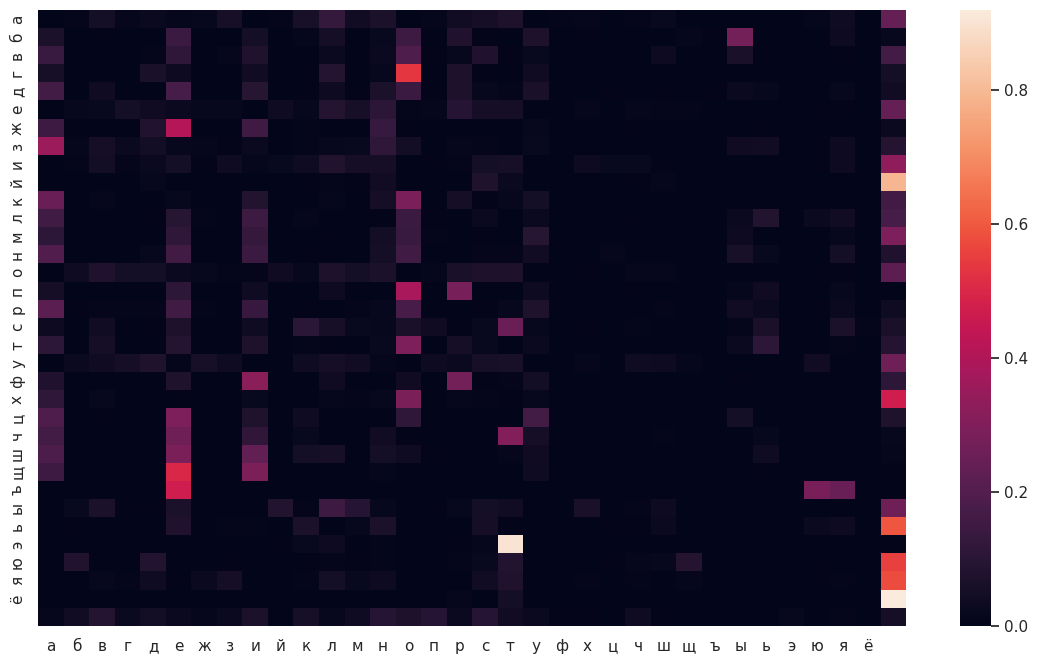

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

Let's calculate the probability of encountering a four-character string that starts with the letter 'П' and ends with the letter 'Р'.

In [ ]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUS)
for c in RUS:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], end]
    if proba > 0:
        print(''.join(['п', c, c, 'р']), proba)

паар 6.355983300913509e-05
пввр 7.824275967962348e-09
пггр 8.157068545221271e-07
пеер 0.000301539610609176
пиир 8.81575746485747e-06
пккр 4.9089431099740965e-06
пллр 1.608999017827688e-08
пммр 8.758850812319131e-10
пннр 1.0706042676862299e-07
поор 0.0007199950607028898
пппр 1.497876812041649e-05
пррр 3.6911290704446765e-06
псср 4.4033708218467607e-08
пттр 2.9606287168913383e-06
пуур 2.1499465698457823e-05
пффр 6.352570538117333e-06
пччр 1.7569467337310998e-07
пшшр 1.2751923314891131e-09
пщщр 2.1390970167301647e-09
пыыр 6.125119470292571e-06
пььр 1.4796970895239722e-07
пээр 5.092481815055741e-09
пяяр 1.2403822299421453e-06
п  р 1.1846198731430023e-06


Using the transition probability matrix, let's generate a nine-character word that starts with the letter 'Б'.

In [ ]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUS), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бужах ебл


Let's evaluate the series 'monthly-sales-of-company-x-jan-6' using HMM and try to build a naive forecast of the series using the mean of each component.

In [ ]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")

In [ ]:
sales_of_company_x = sales_of_company_x.iloc[:,1]

In [ ]:
pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
from hmmlearn import hmm

In [ ]:
values = sales_of_company_x.values.reshape(-1,1)

In [ ]:
for n in range(1, 14):
    model = hmm.GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -516.1188153076023
2 -487.46310148660467
3 -481.0743196571745
4 -454.54123779387453
5 -444.6074688167466
6 -443.81738441412904


7 -455.1600154444364
8 -446.43575465433963
9 -434.94559033214824
10 -423.9905237009131


11 -408.3789452867209
12 -429.54000615809315
13 -414.4874140597426


In [ ]:
model = hmm.GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

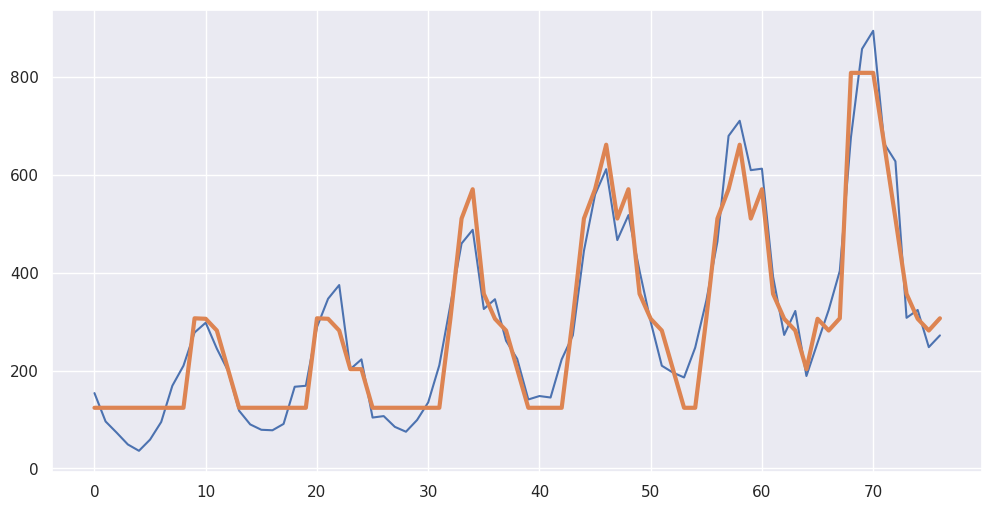

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)